In [48]:
import sympy
import math
from scipy.optimize import fsolve
import time

In [55]:
# test data
#arr_returns = [0.01, 0.02, -0.01, 0.02, 0.04, 0.03, 0.015, 0.01, 0.02, 0.03]
arr_returns = [0.01, 0.02,0.03]

### 方法一：用sympy的solve

In [13]:
def calRiskiness(arr_returns):
    x = sympy.symbols('x')
    s = -1 * len(arr_returns)
    for r in arr_returns:
        s = s + sympy.exp(-1*r/x)
    return sympy.solve(s,x)

In [14]:
start_time = time.time()
risk = calRiskiness(arr_returns)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))
print(risk)

--- 0.6550233364105225 seconds ---
[]


### 方法二：用scipy的fsolve

In [59]:
arr_ret = np.array(arr_returns)
def f1(x):
    #return math.exp(-1*arr_returns[0]/x) + math.exp(-1*arr_returns[1]/x) + math.exp(-1*arr_returns[2]/x) - 3
    return sum( np.exp(-1*arr_ret/x) ) - len(arr_ret)
guess = 10**(-1)
risk2 = fsolve(f1,guess)
print(risk2)

[5.50192476e+13]


C:\Users\R\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### 驗算

In [6]:
r1 = arr_returns[0]
r2 = arr_returns[1]
r3 = arr_returns[2]

e1 = (math.exp(-1*r1/risk[0]) + math.exp(-1*r2/risk[0]) + math.exp(-1*r3/risk[0]))/3
e2 = (math.exp(-1*r1/risk2) + math.exp(-1*r2/risk2) + math.exp(-1*r3/risk2))/3
print(e1)
print(e2)

1.0
0.9999999999999997


# 畫圖測試

C:\Users\R\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


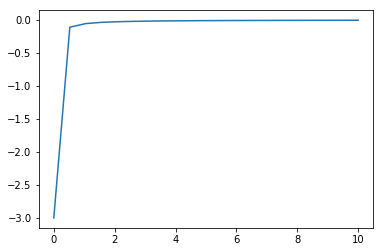

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10,20)
y = [f1(a) for a in x]
plt.plot(x,y)

# 測試

In [58]:
a = [1,2,3]
a = np.array(a)
b = a * 3
sum(np.exp(-1*a/4))
np.exp(-1*arr_ret/5)

array([0.998002  , 0.99600799, 0.99401796])